In [1]:
import pandas as pd
import os, json

In [2]:
MAIN_DIR = ".."
ARTIFACT_DIR = os.path.join(MAIN_DIR, "artifacts")
EXP_RUN = "gpt-4_1024_128_RawVectorSearch_13-10-2023-18-16"

result_df = pd.read_csv(
    os.path.join(ARTIFACT_DIR, EXP_RUN, "results.csv"),
)

## Accuracy

In [5]:
preds = result_df["gpt4_classification"]
labels = result_df["human_gt"]
result_df["match"] = (preds == labels)

accuracy = (preds == labels).sum() / len(result_df) * 100

print(f"Accuracy score: {accuracy}")

Accuracy score: 46.478873239436616


## Prediction Tendency

In [6]:
result_df.groupby("human_gt")["match"].value_counts()

human_gt                  match
INSUFFICIENT INFORMATION  False     8
                          True      2
MAY BE APPROPRIATE        False    13
                          True      1
USUALLY APPROPRIATE       True     19
                          False     1
USUALLY NOT APPROPRIATE   False    16
                          True     11
Name: match, dtype: int64

In [7]:
result_df["gpt4_classification"].value_counts()

USUALLY APPROPRIATE         50
USUALLY NOT APPROPRIATE     16
MAY BE APPROPRIATE           3
INSUFFICIENT INFORMATION     2
Name: gpt4_classification, dtype: int64

<Axes: xlabel='count', ylabel='gpt4_classification'>

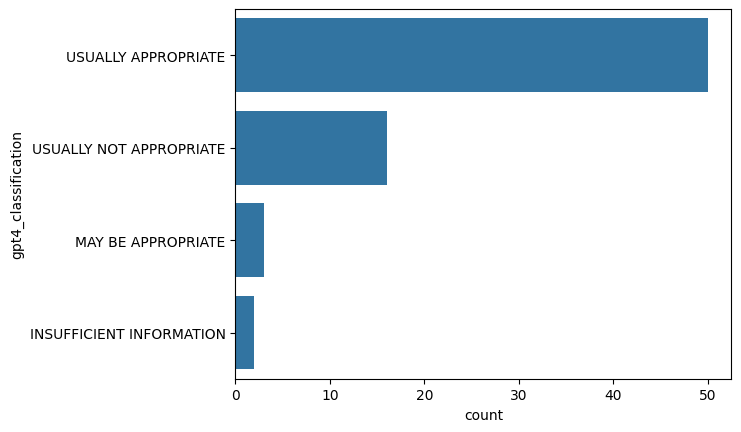

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.countplot(result_df["gpt4_classification"])